# Location recommendation for various business applications.
_This notebook consists of the code for a model which provides a recommendation system which provide the data of venues at the nieghbourhoods of the city of Chicago._

## Libraries Import

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # plotting library

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print('Libraries Imported')

Libraries Imported


## Data Import

In [2]:
link = "https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago"

table = pd.read_html(link,header=0)[0]

# create new column names
table.columns = ['Neighbourhood', 'Community_Area']

print('Data Imported')

Data Imported


In [3]:
table

,Neighbourhood,Community_Area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square
5,Ashburn,Ashburn
6,Ashburn Estates,Ashburn
7,Auburn Gresham,Auburn Gresham
8,Avalon Park,Avalon Park
9,Avondale,Avondale


In [4]:
table['Community_Area'].replace('Austin, Humboldt Park','Humboldt Park',inplace=True)
table['Community_Area'].replace('West Town, Logan Square','Logan Square',inplace=True)
table['Community_Area'].replace('Avondale, Irving Park','Irving Park',inplace=True)
table['Community_Area'].replace('Chatham, Roseland','Roseland',inplace=True)
print("'Table' Cleaned")

'Table' Cleaned


## Merging the Location Coordinates with the _"Table"._

In [5]:
for i, j, k in zip(table.Neighbourhood, table.Community_Area, table.index):
    if j=='Lincoln Square':
        table.iat[k,1]=table.iat[k,0]
for i , j in zip(table.index, table.Community_Area):
    if j=='Lincoln Square':
        table.drop(i,axis=0,inplace=True)      

In [6]:
table.shape

(245, 2)

In [7]:
nom = Nominatim(user_agent="foursquare_agent")
n=nom.geocode('Chicago')
Clat=n.latitude
Clon=n.longitude
print('Chicago Location: ', n.longitude, n.latitude)

Chicago Location:  -87.6244212 41.8755616


In [8]:
longitude=[]
latitude=[]
for area in table.Community_Area:
        n=nom.geocode(area+', Chicago')
        longitude.append(n.longitude)
        latitude.append(n.latitude)
        print(area,':',n.longitude,n.latitude)


Albany Park : -87.7161739 41.9719367
Riverdale : -87.6049644 41.6678347
Edgewater : -87.6639516 41.9833689
Archer Heights : -87.7261651 41.8114215
Armour Square : -87.633107 41.8400333
Ashburn : -87.7111628 41.7475332
Ashburn : -87.7111628 41.7475332
Auburn Gresham : -87.6643042 41.750474
Avalon Park : -87.5886584 41.7450346
Avondale : -87.711168 41.9389208
Irving Park : -87.7364471 41.953365
New City : -87.6564403 41.8075333
Belmont Cragin : -87.7686699 41.9316983
Hermosa : -87.7345019 41.928643
Dunning : -87.7964493 41.952809
Dunning : -87.7964493 41.952809
Beverly : -87.6717674 41.7181532
Ashburn : -87.7111628 41.7475332
Morgan Park : -87.6667156 41.6903117
Norwood Park : -87.8005772013227 41.9855895
Lake View : -87.6554287829005 41.94705
Bowmanville : -87.6937374 41.9721331
Washington Heights : -87.65616 41.7064229
Belmont Cragin : -87.7686699 41.9316983
Bridgeport : -87.651028 41.8379385
Brighton Park : -87.6989421 41.8189217
Douglas : -87.6179536 41.8348565
Logan Square : -87.706

In [9]:
table['Longitude']=longitude
table['Latitude']=latitude
print('Location Coordinates merged with "table"')
table.head()

Location Coordinates merged with "table"


,Neighbourhood,Community_Area,Longitude,Latitude
0,Albany Park,Albany Park,-87.716174,41.971937
1,Altgeld Gardens,Riverdale,-87.604964,41.667835
2,Andersonville,Edgewater,-87.663952,41.983369
3,Archer Heights,Archer Heights,-87.726165,41.811422
4,Armour Square,Armour Square,-87.633107,41.840033


## Visualising Neighbourhoods of Chicago on map.

In [10]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[Clat, Clon], zoom_start=10)

# add markers to map
for lat, lng, CA, neighbourhood in zip(table['Latitude'], table['Longitude'], table['Community_Area'], table['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, CA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

## Venues Data Import

In [14]:
CLIENT_ID = 'JOJGDNM2CCM0ZEIXTZ4GW210BTB4L2E3PPTZK5GYLTTOI0PW' # your Foursquare ID
CLIENT_SECRET = 'Q2TX2S0ETV3JVY3Y1OS0XUBVUMC03YFATP0W250KKML2N3JJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
limit = 100
radius=500

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood_Latitude', 
                  'Neighbourhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [16]:
chicago_venues = getNearbyVenues(names=table['Neighbourhood'],
                                   latitudes=table['Latitude'],
                                   longitudes=table['Longitude']
                                  )



Albany Park
Altgeld Gardens
Andersonville
Archer Heights
Armour Square
Ashburn
Ashburn Estates
Auburn Gresham
Avalon Park
Avondale
Avondale Gardens
Back of the Yards
Belmont Central
Belmont Gardens
Belmont Heights
Belmont Terrace
Beverly
Beverly View
Beverly Woods
Big Oaks
Boystown
Bowmanville
Brainerd
Brickyard
Bridgeport
Brighton Park
Bronzeville
Bucktown
Budlong Woods
Buena Park
Burnside
Cabrini–Green
Calumet Heights
Canaryville
Central Station
Chatham
Chicago Lawn
Chinatown
Chrysler Village
Clarendon Park
Clearing East
Clearing West
Cottage Grove Heights
Cragin
Crestline
Dearborn Homes
Dearborn Park
Douglas Park
Dunning
East Beverly
East Chatham
East Garfield Park
East Hyde Park
East Pilsen
East Side
East Village
Eden Green
Edgebrook
Edgewater
Edgewater Beach
Edgewater Glen
Edison Park
Englewood
Fernwood
Fifth City
Ford City
Forest Glen
Fuller Park
Fulton River District
Gage Park
Galewood
The Gap
Garfield Ridge
Gladstone Park
Gold Coast
Golden Gate
Goose Island
Graceland West
Grand

In [22]:
chicago_venues.groupby('Neighbourhood').count()

,Neighbourhood_Latitude,Neighbourhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Neighbourhood,,,,,,
Albany Park,13,13,13,13,13,13
Andersonville,60,60,60,60,60,60
Archer Heights,23,23,23,23,23,23
Armour Square,12,12,12,12,12,12
Ashburn,6,6,6,6,6,6
Ashburn Estates,6,6,6,6,6,6
Auburn Gresham,9,9,9,9,9,9
Avalon Park,13,13,13,13,13,13
Avondale,31,31,31,31,31,31


In [23]:
chicago_venues.head()

,Neighbourhood,Neighbourhood_Latitude,Neighbourhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Albany Park,41.971937,-87.716174,Chicago Produce,41.970553,-87.716327,Grocery Store
1,Albany Park,41.971937,-87.716174,Cairo Nights Hookah Lounge,41.975776,-87.715547,Hookah Bar
2,Albany Park,41.971937,-87.716174,Nighthawk,41.967974,-87.713415,Cocktail Bar
3,Albany Park,41.971937,-87.716174,Popeyes Louisiana Kitchen,41.968459,-87.713156,Fried Chicken Joint
4,Albany Park,41.971937,-87.716174,Peking Mandarin Resturant,41.968292,-87.715783,Chinese Restaurant


In [24]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue_Category'].unique())))

There are 257 uniques categories.


## Analyse Each Neighbourhood

In [25]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighbourhood'] = chicago_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Neighbourhood,ATM,Accessories Store,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Check Cashing Service,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Currency Exchange,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [26]:
chicago_onehot.shape

(5701, 258)

#### Grouping rows by Neighbourhood and by taking the mean of the frequency of occurrence of each category

In [27]:
chicago_grouped = chicago_onehot.groupby('Neighbourhood').mean().reset_index()
chicago_grouped.head()

,Neighbourhood,ATM,Accessories Store,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Check Cashing Service,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Currency Exchange,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.076923,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.000000,0.0,0.076923,0.0,0.0,0.076923,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0

In [28]:
chicago_grouped.shape

(241, 258)

#### Print each neighborhood along with the top 5 most common venues

In [29]:
num_top_venues = 5

for hood in chicago_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
               venue  freq
0     Sandwich Place  0.15
1        Gas Station  0.08
2       Cocktail Bar  0.08
3  Mobile Phone Shop  0.08
4      Grocery Store  0.08


----Andersonville----
                venue  freq
0      Sandwich Place  0.05
1            Pharmacy  0.05
2    Sushi Restaurant  0.05
3    Asian Restaurant  0.05
4  Mexican Restaurant  0.05


----Archer Heights----
               venue  freq
0  Mobile Phone Shop  0.13
1        Gas Station  0.09
2      Grocery Store  0.09
3               Park  0.09
4      Big Box Store  0.04


----Armour Square----
                venue  freq
0  Chinese Restaurant  0.25
1          Sports Bar  0.08
2         Gas Station  0.08
3       Hot Dog Joint  0.08
4      Breakfast Spot  0.08


----Ashburn----
                        venue  freq
0          Italian Restaurant  0.17
1          Light Rail Station  0.17
2              Cosmetics Shop  0.17
3                        Food  0.17
4  Construction & Landscaping  0.17


----Ashburn

#### Putting the venue data into a *pandas* dataframe

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = chicago_grouped['Neighbourhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Sandwich Place,Bakery,Gas Station,Chinese Restaurant,Café,Grocery Store,Cocktail Bar,Fried Chicken Joint,Korean Restaurant,Mobile Phone Shop
1,Andersonville,Pharmacy,Mexican Restaurant,Sandwich Place,Sushi Restaurant,Asian Restaurant,Gym / Fitness Center,Antique Shop,Mobile Phone Shop,Coffee Shop,Deli / Bodega
2,Archer Heights,Mobile Phone Shop,Grocery Store,Gas Station,Park,Optical Shop,Sandwich Place,Bar,Bank,Big Box Store,Chinese Restaurant
3,Armour Square,Chinese Restaurant,Gas Station,Asian Restaurant,Cosmetics Shop,Hot Dog Joint,Boutique,Sports Bar,Sandwich Place,Breakfast Spot,Italian Restaurant
4,Ashburn,Cosmetics Shop,Italian Restaurant,Light Rail Station,Electronics Store,Food,Construction & Landscaping,Deli / Bodega,Eye Doctor,Flower Shop,Flea Market


In [33]:
neighbourhoods_venues_sorted.shape

(241, 11)

## Cluster Neighborhoods on the basis of location

In [34]:
table2 = table[['Longitude', 'Latitude']]
table2.head()

,Longitude,Latitude
0,-87.716174,41.971937
1,-87.604964,41.667835
2,-87.663952,41.983369
3,-87.726165,41.811422
4,-87.633107,41.840033


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

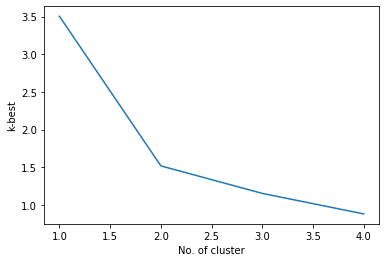

In [35]:
k_best = {}
for k in range(1,5):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(table2)
    table2['Cluster'] = km.labels_
    k_best[k] = km.inertia_

plt.figure()
plt.plot(list(k_best.keys()), list(k_best.values()))
plt.xlabel("No. of cluster")
plt.ylabel("k-best")
plt.show()
print()


**From the above graph, according to elbow method best value for K is 2**

In [36]:
# set number of clusters
kclusters = 2

#chicago_grouped_clustering = chicago_grouped.drop('Neighbourhood', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=4).fit(table2.drop('Cluster', axis=1))

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [38]:
table3=table
table3['Cluster Labels']=kmeans.labels_
table3.head()

,Neighbourhood,Community_Area,Longitude,Latitude,Cluster Labels
0,Albany Park,Albany Park,-87.716174,41.971937,0
1,Altgeld Gardens,Riverdale,-87.604964,41.667835,1
2,Andersonville,Edgewater,-87.663952,41.983369,0
3,Archer Heights,Archer Heights,-87.726165,41.811422,1
4,Armour Square,Armour Square,-87.633107,41.840033,1


In [45]:
chicago_merged.dropna(how='any',inplace=True)
chicago_merged.reset_index(inplace=True)
chicago_merged.drop('index',axis=1,inplace=True)

chicago_merged.head()


,Neighbourhood,Community_Area,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Albany Park,-87.716174,41.971937,0,Sandwich Place,Bakery,Gas Station,Chinese Restaurant,Café,Grocery Store,Cocktail Bar,Fried Chicken Joint,Korean Restaurant,Mobile Phone Shop
1,Andersonville,Edgewater,-87.663952,41.983369,0,Pharmacy,Mexican Restaurant,Sandwich Place,Sushi Restaurant,Asian Restaurant,Gym / Fitness Center,Antique Shop,Mobile Phone Shop,Coffee Shop,Deli / Bodega
2,Archer Heights,Archer Heights,-87.726165,41.811422,1,Mobile Phone Shop,Grocery Store,Gas Station,Park,Optical Shop,Sandwich Place,Bar,Bank,Big Box Store,Chinese Restaurant
3,Armour Square,Armour Square,-87.633107,41.840033,1,Chinese Restaurant,Gas Station,Asian Restaurant,Cosmetics Shop,Hot Dog Joint,Boutique,Sports Bar,Sandwich Place,Breakfast Spot,Italian Restaurant
4,Ashburn,Ashburn,-87.711163,41.747533,1,Cosmetics Shop,Italian Restaurant,Light Rail Station,Electronics Store,Food,Construction & Landscaping,Deli / Bodega,Eye Doctor,Flower Shop,Flea Market


In [44]:
# add clustering labels
#neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = table3

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Community_Area')

chicago_merged.head() # check the last columns!

,Neighbourhood,Community_Area,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Albany Park,-87.716174,41.971937,0,Sandwich Place,Bakery,Gas Station,Chinese Restaurant,Café,Grocery Store,Cocktail Bar,Fried Chicken Joint,Korean Restaurant,Mobile Phone Shop
1,Altgeld Gardens,Riverdale,-87.604964,41.667835,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andersonville,Edgewater,-87.663952,41.983369,0,Pharmacy,Mexican Restaurant,Sandwich Place,Sushi Restaurant,Asian Restaurant,Gym / Fitness Center,Antique Shop,Mobile Phone Shop,Coffee Shop,Deli / Bodega
3,Archer Heights,Archer Heights,-87.726165,41.811422,1,Mobile Phone Shop,Grocery Store,Gas Station,Park,Optical Shop,Sandwich Place,Bar,Bank,Big Box Store,Chinese Restaurant
4,Armour Square,Armour Square,-87.633107,41.840033,1,Chinese Restaurant,Gas Station,Asian Restaurant,Cosmetics Shop,Hot Dog Joint,Boutique,Sports Bar,Sandwich Place,Breakfast Spot,Italian Restaurant


## Visualize the resulting clusters

In [46]:
# create map
map_clusters = folium.Map(location=[Clat, Clon], zoom_start=11)

# set color scheme for the clusters
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighbourhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color='white',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [47]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Community_Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Sandwich Place,Bakery,Gas Station,Chinese Restaurant,Café,Grocery Store,Cocktail Bar,Fried Chicken Joint,Korean Restaurant,Mobile Phone Shop
1,Edgewater,Pharmacy,Mexican Restaurant,Sandwich Place,Sushi Restaurant,Asian Restaurant,Gym / Fitness Center,Antique Shop,Mobile Phone Shop,Coffee Shop,Deli / Bodega
8,Avondale,Park,Sandwich Place,Food Truck,Chinese Restaurant,Grocery Store,Road,Diner,Korean Restaurant,Electronics Store,Bar
9,Irving Park,Coffee Shop,Sandwich Place,Gym,Pizza Place,Bar,Bus Line,Lawyer,Taco Place,Tapas Restaurant,Chinese Restaurant
11,Hermosa,Art Gallery,Optical Shop,Theater,Department Store,Latin American Restaurant,Diner,Park,Discount Store,Supermarket,Check Cashing Service
12,Dunning,Deli / Bodega,American Restaurant,Intersection,Indoor Play Area,Yoga Studio,Filipino Restaurant,Eye Doctor,Fabric Shop,Farm,Farmers Market
13,Dunning,Deli / Bodega,American Restaurant,Intersection,Indoor Play Area,Yoga Studio,Filipino Restaurant,Eye Doctor,Fabric Shop,Farm,Farmers Market
17,Lake View,Sports Bar,Bar,General Entertainment,Sandwich Place,Pizza Place,Baseball Stadium,Dive Bar,Restaurant,Thai Restaurant,BBQ Joint
18,Bowmanville,Sandwich Place,New American Restaurant,Pub,Korean Restaurant,Bar,Tailor Shop,Donut Shop,Italian Restaurant,Russian Restaurant,Dive Bar
22,Logan Square,Coffee Shop,Bar,Italian Restaurant,Café,Food & Drink Shop,Park,Train Station,Latin American Restaurant,Bookstore,Cocktail Bar


In [48]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Community_Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Archer Heights,Mobile Phone Shop,Grocery Store,Gas Station,Park,Optical Shop,Sandwich Place,Bar,Bank,Big Box Store,Chinese Restaurant
3,Armour Square,Chinese Restaurant,Gas Station,Asian Restaurant,Cosmetics Shop,Hot Dog Joint,Boutique,Sports Bar,Sandwich Place,Breakfast Spot,Italian Restaurant
4,Ashburn,Cosmetics Shop,Italian Restaurant,Light Rail Station,Electronics Store,Food,Construction & Landscaping,Deli / Bodega,Eye Doctor,Flower Shop,Flea Market
5,Ashburn,Cosmetics Shop,Italian Restaurant,Light Rail Station,Electronics Store,Food,Construction & Landscaping,Deli / Bodega,Eye Doctor,Flower Shop,Flea Market
6,Auburn Gresham,Fast Food Restaurant,Intersection,Cosmetics Shop,BBQ Joint,Pharmacy,Greek Restaurant,Dim Sum Restaurant,Lounge,Yoga Studio,Fabric Shop
7,Avalon Park,Boutique,Fast Food Restaurant,Burger Joint,ATM,Diner,Sandwich Place,Business Service,Grocery Store,Cajun / Creole Restaurant,Pizza Place
10,New City,American Restaurant,Construction & Landscaping,Grocery Store,Park,Optical Shop,Chinese Restaurant,Farm,Brewery,Food,Spanish Restaurant
14,Beverly,Cosmetics Shop,Train Station,Bakery,Pizza Place,Burger Joint,Italian Restaurant,Park,Juice Bar,Grocery Store,Exhibit
15,Ashburn,Cosmetics Shop,Italian Restaurant,Light Rail Station,Electronics Store,Food,Construction & Landscaping,Deli / Bodega,Eye Doctor,Flower Shop,Flea Market
16,Morgan Park,Convenience Store,Park,Currency Exchange,Bakery,Track,Grocery Store,Train Station,BBQ Joint,Construction & Landscaping,Diner
